<a href="https://colab.research.google.com/github/buildwithdemis/machinelearning/blob/main/ML_ch_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise - Train a multiple linear regression model**


In this exercise, we'll train both a simple linear-regression model and a multiple linear-regression model and compare their performance using R-Squared.

Loading data
Let's start by having a look at our data.

In [1]:
import pandas
!pip install statsmodels
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv

#Import the data from the .csv file
dataset = pandas.read_csv('doggy-illness.csv', delimiter="\t")

#Let's have a look at the data
dataset

--2025-06-03 01:28:48--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py’

graphing.py         100%[===================>]  21.01K  --.-KB/s    in 0.001s  

2025-06-03 01:28:48 (14.0 MB/s) - ‘graphing.py’ saved [21511/21511]

--2025-06-03 01:28:48--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, aw

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53
...,...,...,...,...,...,...,...,...
93,0,0,4.5,38,37.939942,0,0,7.35
94,1,0,1.8,11,38.790426,1,1,12.18
95,0,0,6.6,20,39.489962,0,0,15.84
96,0,0,6.9,32,38.575742,1,1,9.79


For this exercise, we'll try to predict core_temperature from some of the other available features.

**Data visualization**

Let's quickly eyeball which features seem to have some kind of relationship with core_temperature.

<Figure size 800x500 with 0 Axes>

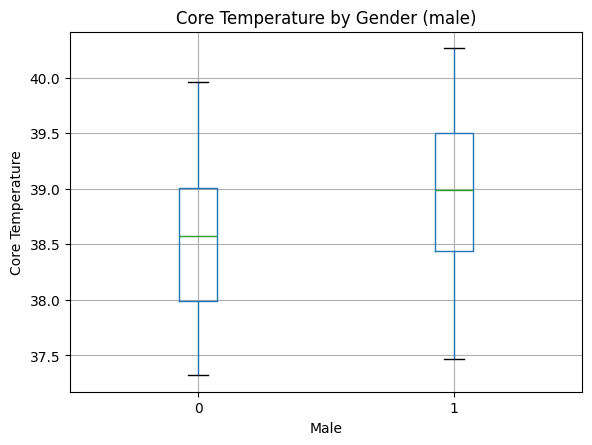

<Figure size 800x500 with 0 Axes>

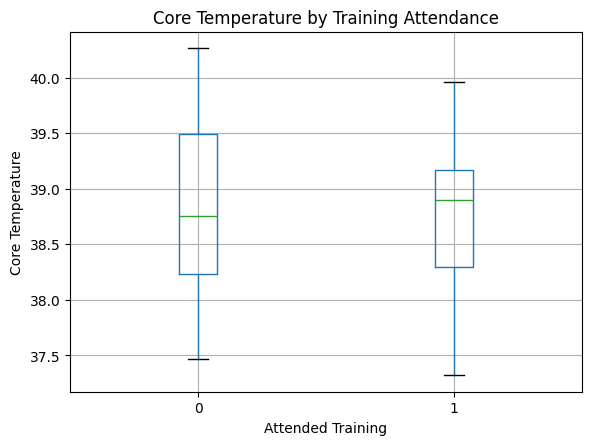

<Figure size 800x500 with 0 Axes>

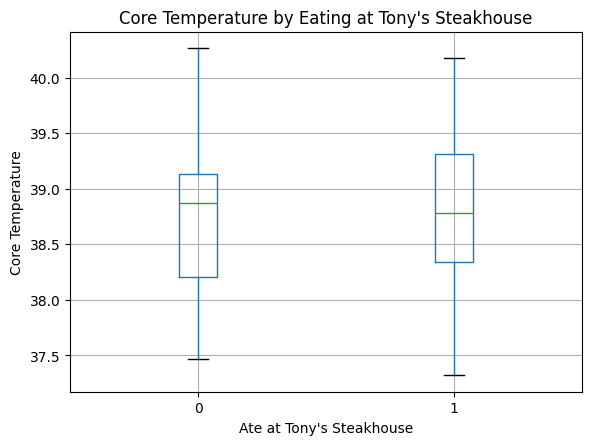

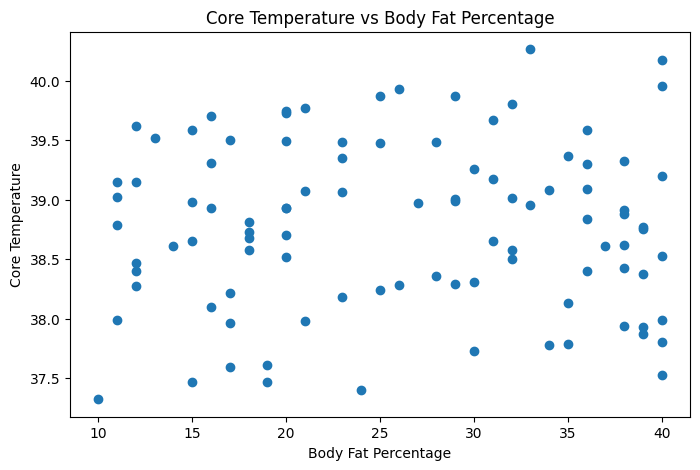

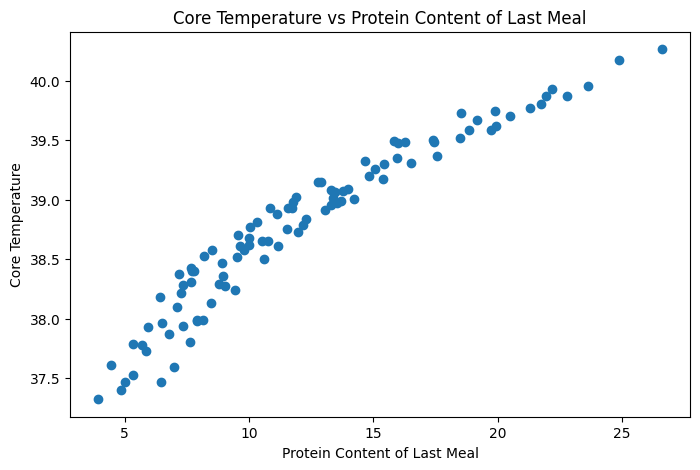

Text(0, 0.5, 'Core Temperature')

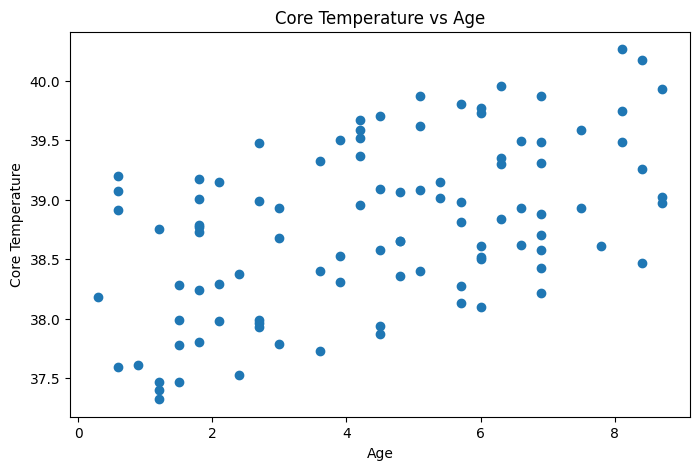

In [2]:
import matplotlib.pyplot as plt

# Box and whisker plots
plt.figure(figsize=(8, 5))
dataset.boxplot(column="core_temperature", by="male")
plt.title("Core Temperature by Gender (male)")
plt.suptitle("")
plt.xlabel("Male")
plt.ylabel("Core Temperature")
plt.show()

plt.figure(figsize=(8, 5))
dataset.boxplot(column="core_temperature", by="attended_training")
plt.title("Core Temperature by Training Attendance")
plt.suptitle("")
plt.xlabel("Attended Training")
plt.ylabel("Core Temperature")
plt.show()

plt.figure(figsize=(8, 5))
dataset.boxplot(column="core_temperature", by="ate_at_tonys_steakhouse")
plt.title("Core Temperature by Eating at Tony's Steakhouse")
plt.suptitle("")
plt.xlabel("Ate at Tony's Steakhouse")
plt.ylabel("Core Temperature")
plt.show()

# Scatter plots
plt.figure(figsize=(8, 5))
plt.scatter(dataset["body_fat_percentage"], dataset["core_temperature"])
plt.title("Core Temperature vs Body Fat Percentage")
plt.xlabel("Body Fat Percentage")
plt.ylabel("Core Temperature")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(dataset["protein_content_of_last_meal"], dataset["core_temperature"])
plt.title("Core Temperature vs Protein Content of Last Meal")
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(dataset["age"], dataset["core_temperature"])
plt.title("Core Temperature vs Age")
plt.xlabel("Age")
plt.ylabel("Core Temperature")

At a glance, fatter, older, and male dogs seem to more commonly have higher temperatures than thinner, younger, or female dogs. Dogs who ate a lot of protein last night also seem to be more unwell. The other features don't seem particularly useful.

Simple linear regression
Let's try to predict core_temperature using simple linear regression, and note the R-Squared for these relationships.

male
R-squared: 0.0999007443071992


<ipython-input-3-307c255e6f18>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = simple_model.params[1] * x_vals + simple_model.params[0]


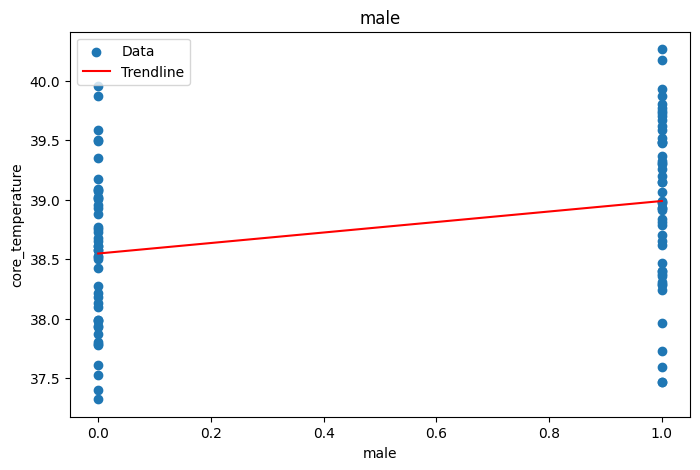

age
R-squared: 0.2648116081342463


<ipython-input-3-307c255e6f18>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = simple_model.params[1] * x_vals + simple_model.params[0]


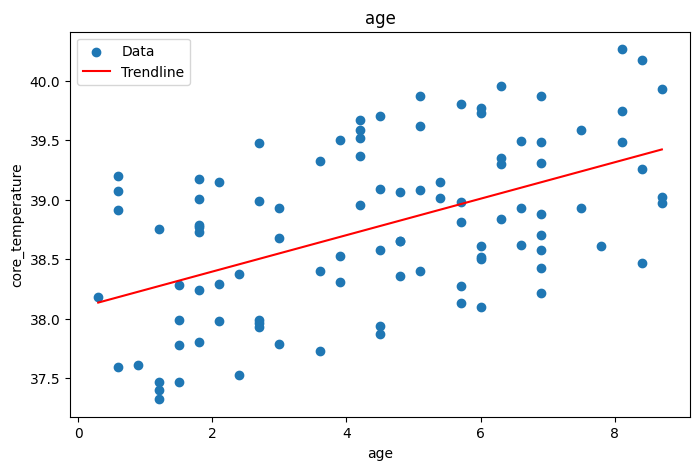

protein_content_of_last_meal
R-squared: 0.9155158150005704


<ipython-input-3-307c255e6f18>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = simple_model.params[1] * x_vals + simple_model.params[0]


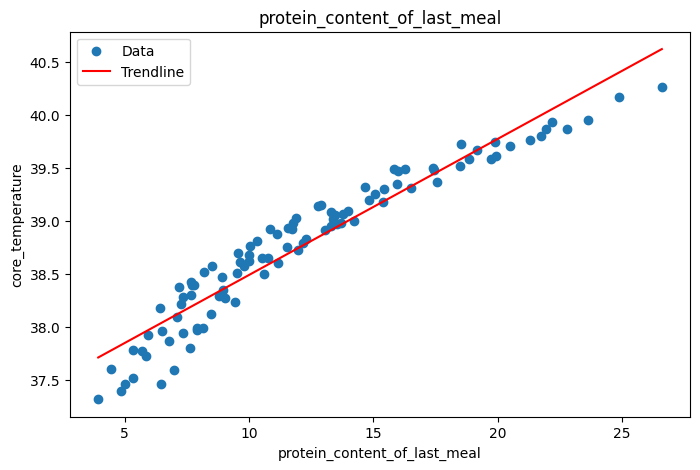

body_fat_percentage
R-squared: 0.00020809002637767193


<ipython-input-3-307c255e6f18>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = simple_model.params[1] * x_vals + simple_model.params[0]


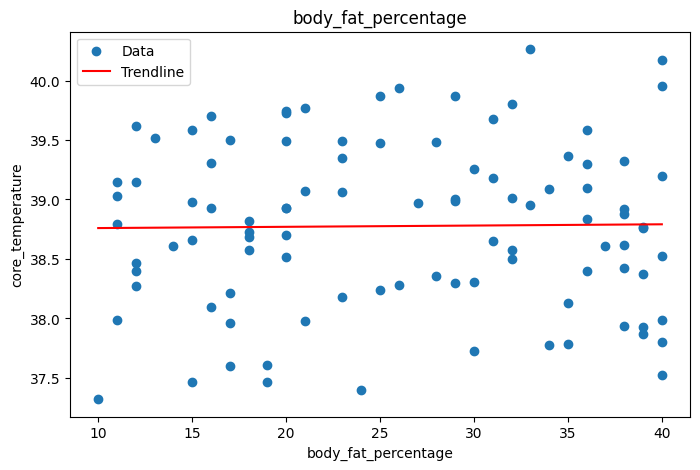

In [3]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

for feature in ["male", "age", "protein_content_of_last_meal", "body_fat_percentage"]:
    # Perform linear regression
    formula = "core_temperature ~ " + feature
    simple_model = smf.ols(formula=formula, data=dataset).fit()

    print(feature)
    print("R-squared:", simple_model.rsquared)

    # Scatter plot with trendline
    plt.figure(figsize=(8, 5))
    plt.scatter(dataset[feature], dataset["core_temperature"], label="Data")

    # Generate trendline values
    x_vals = np.linspace(dataset[feature].min(), dataset[feature].max(), 100)
    y_vals = simple_model.params[1] * x_vals + simple_model.params[0]
    plt.plot(x_vals, y_vals, color="red", label="Trendline")

    plt.xlabel(feature)
    plt.ylabel("core_temperature")
    plt.title(feature)
    plt.legend()
    plt.show()

Scrolling through these graphs, we get R-square values of 0.0002 (body_fat_percentage), 0.1 (male), and 0.26 (age).

While protein_content_of_last_meal looks very promising too, the relationship looks curved, not linear. We'll leave this feature for now and come back to it in the next exercise.

**R-Squared**

We've shown the R-Squared value for these models and used it as a measure of "correctness" for our regression, but what is it?

Intuitively, we can think of R-Squared as ratio for how much better our regression line is than a naive regression that just goes straight through the mean of all examples.

Roughly, the R-Squared is calculated by taking the loss/error of the trained model, and dividing by the loss/error of the naive model. That gives a range where 0 is better and 1 is worse, so the whole thing is subtracted from 1 to flip those results.

In the following code, we once again show the scatter plot with age and core_temperature, but this time, we show two regression lines. The first is the naive line that just goes straight through the mean. This has an R-Squared of 0 (since it's no better than itself). An R-Squared of 1 would be a line that fit each training example perfectly. The second plot shows our trained regression line, and we once again see its R-Squared.

naive R-squared: 0.0
trained R-squared: 0.2648116081342463


<ipython-input-4-be21cf77817b>:7: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  age_naive_model.params[0] = dataset['core_temperature'].mean()
<ipython-input-4-be21cf77817b>:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  age_naive_model.params[1] = 0


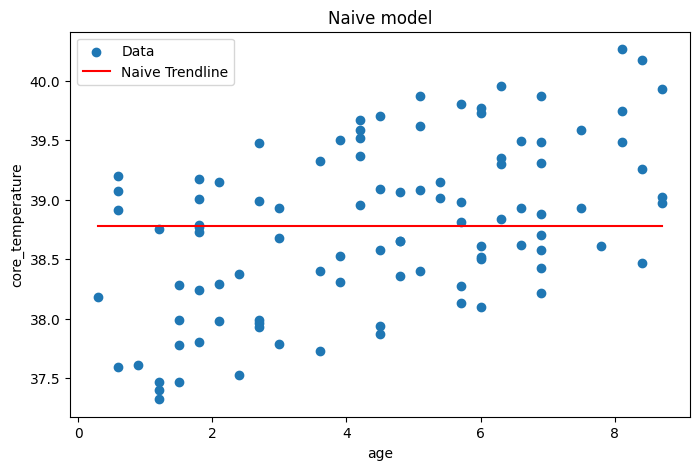

<ipython-input-4-be21cf77817b>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = age_trained_model.params[1] * x_vals + age_trained_model.params[0]


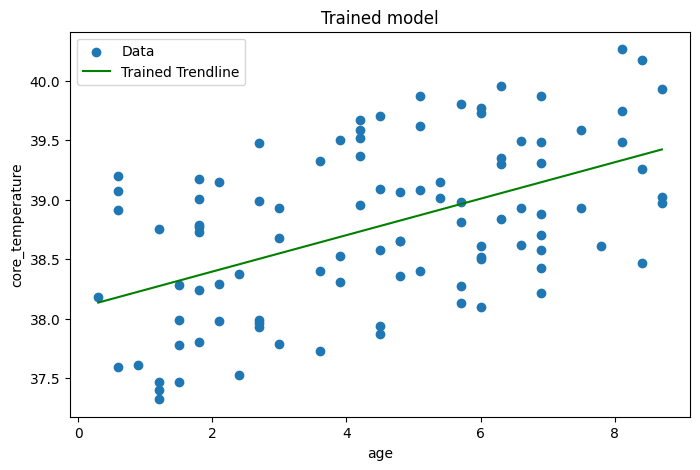

In [4]:
import matplotlib.pyplot as plt
import numpy as np

formula = "core_temperature ~ age"
age_trained_model = smf.ols(formula = formula, data = dataset).fit()
age_naive_model = smf.ols(formula = formula, data = dataset).fit()
age_naive_model.params[0] = dataset['core_temperature'].mean()
age_naive_model.params[1] = 0

print("naive R-squared:", age_naive_model.rsquared)
print("trained R-squared:", age_trained_model.rsquared)

# Naive model plot
plt.figure(figsize=(8, 5))
plt.scatter(dataset["age"], dataset["core_temperature"], label="Data")

# Naive trendline: horizontal line at the mean
mean_temp = dataset["core_temperature"].mean()
plt.plot(
    [dataset["age"].min(), dataset["age"].max()],
    [mean_temp, mean_temp],
    color="red",
    label="Naive Trendline"
)

plt.xlabel("age")
plt.ylabel("core_temperature")
plt.title("Naive model")
plt.legend()
plt.show()

# Trained model plot
plt.figure(figsize=(8, 5))
plt.scatter(dataset["age"], dataset["core_temperature"], label="Data")

# Trained trendline
x_vals = np.linspace(dataset["age"].min(), dataset["age"].max(), 100)
y_vals = age_trained_model.params[1] * x_vals + age_trained_model.params[0]
plt.plot(x_vals, y_vals, color="green", label="Trained Trendline")

plt.xlabel("age")
plt.ylabel("core_temperature")
plt.title("Trained model")
plt.legend()
plt.show()

**Multiple Linear Regression**

Instead of modeling these separately, let's try to combine these into a single model. Body fat didn't seem to be useful after all, so let's just use male and age as features.

In [5]:
model = smf.ols(formula = "core_temperature ~ age + male", data = dataset).fit()

print("R-squared:", model.rsquared)

R-squared: 0.3148512699768006


By using both features at the same time, we got a better result than any of the one-feature (univariate) models.

How can we view this, though? Well, a simple linear regression is drawn in 2D. If we're working with an extra variable, we add one dimension and work in 3D.

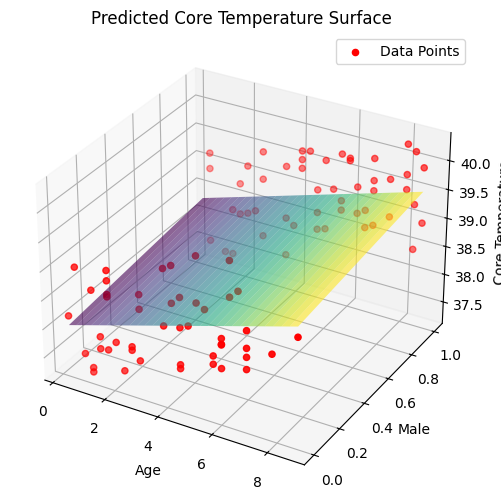

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the prediction function
def predict(age, male):
    df = pd.DataFrame(dict(age=age.ravel(), male=male.ravel()))
    return model.predict(df).values.reshape(age.shape)

# Create a meshgrid over the age and male feature ranges
age_range = np.linspace(dataset.age.min(), dataset.age.max(), 30)
male_range = np.array([0, 1])  # since male is binary

age_grid, male_grid = np.meshgrid(age_range, male_range)
z_vals = predict(age_grid, male_grid)

# Create the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(age_grid, male_grid, z_vals, alpha=0.6, cmap='viridis', edgecolor='none')

# Scatter plot of actual data points
ax.scatter(dataset.age, dataset.male, dataset.core_temperature, color='red', label='Data Points')

ax.set_xlabel("Age")
ax.set_ylabel("Male")
ax.set_zlabel("Core Temperature")
ax.set_title("Predicted Core Temperature Surface")

plt.legend()
plt.show()

**Inspecting our model**

When we have more than two features, it becomes very difficult to visualize these models. We usually have to look at the parameters directly. Let's do that now. Statsmodels, one of the common machine learning and statistics libraries, provides a summary() method that provides information about our model.

In [7]:
# Print summary information
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       core_temperature   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.83
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           1.58e-08
Time:                        01:46:41   Log-Likelihood:                -85.295
No. Observations:                  98   AIC:                             176.6
Df Residuals:                      95   BIC:                             184.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9793      0.135    282.094      0.000      37.712      38.247
age            0.1406      0.026      5.459      0.000       0.089       0.192
male           0.3182      0.121      2.634      0.010       0.078       0.558
==============================================================================
Omnibus:                       21.610   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.227
Skew:                           0.121   Prob(JB):                       0.0733
Kurtosis:                       1.895   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If we look at the top right-hand corner, we can see our R-squared statistic that we printed out earlier.

Slightly down and to the left, we can also see information about the data we trained our model on. For example, we can see that we trained it on 98 observations (No. Observations).

Under this, we find information about our parameters in a column called coef (which stands for coefficients, a synonym for parameters in machine learning). Here, we can see the intercept was about 38, meaning that the model predicts a core temperature of 38 for a dog with age=0 and male=0. Underneath this, we see the parameter for age is 0.14, meaning that for each additional year of age, the predicted temperature would rise 0.14 degrees celsius. For male, we can see a parameter of 0.32, meaning that the model estimates all dogs (that is, where male == 1) to have temperatures 0.32 degrees celsius higher than female dogs (where male == 0).

Although we don't have space here to go into detail, the P column is also very useful. This tells us how confident the model is about this parameter value. As a rule of thumb, if the p-value is less than 0.05, there is a good chance that this relationship if trustable. For example, here both age and male are less than 0.05, so we should feel confident using this model in the real world.

As a final exercise, let's do the same thing with our earlier simple linear-regression model, relating age to core_temperature. Read through the following table and see what you can make out from this model.

In [8]:
age_trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       core_temperature   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     34.58
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           5.94e-08
Time:                        01:47:34   Log-Likelihood:                -88.749
No. Observations:                  98   AIC:                             181.5
Df Residuals:                      96   BIC:                             186.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.0879      0.132    288.373      0.000      37.826      38.350
age            0.1533      0.026      5.880      0.000       0.102       0.205
==============================================================================
Omnibus:                       43.487   Durbin-Watson:                   2.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.605
Skew:                           0.087   Prob(JB):                       0.0368
Kurtosis:                       1.740   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Summary**

We covered the following concepts in this exercise:
*   Built simple and multiple linear-regression models.
*   Compared the performance of both models by looking at R-Squared values.
*   Inspected models to understand how they work.
